Região: North
Dimensões de X: (18, 2)
Dimensões de y: (18,)


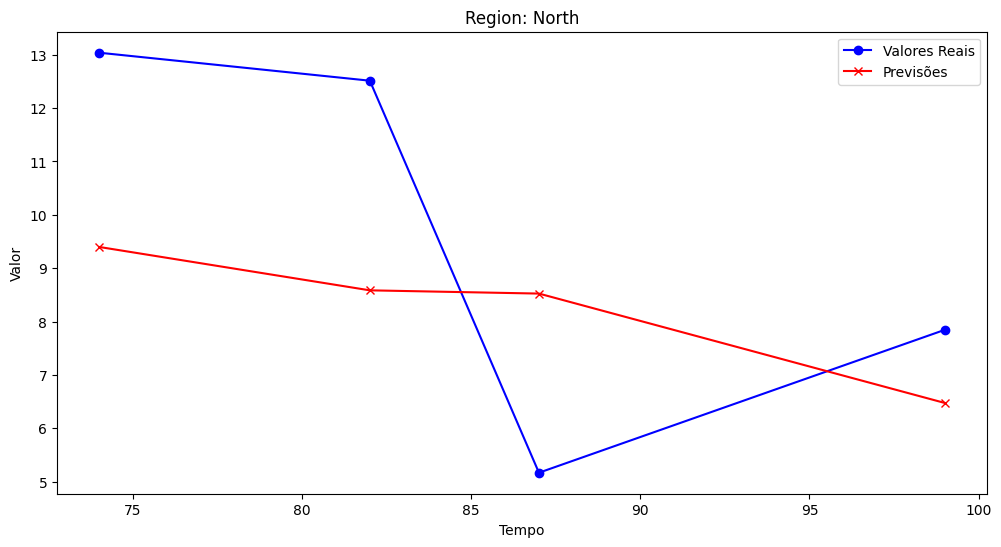

Região: South
Dimensões de X: (24, 2)
Dimensões de y: (24,)


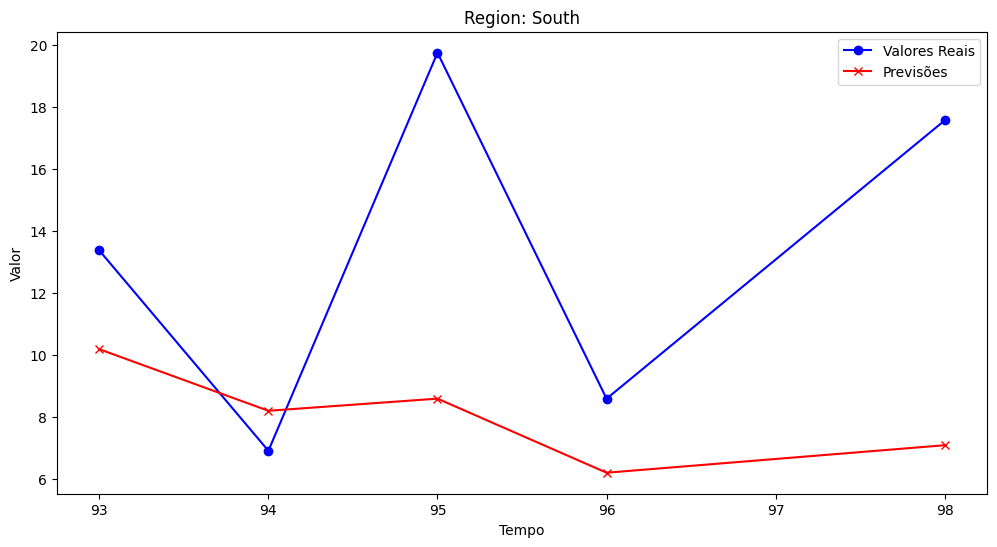

Região: East
Dimensões de X: (22, 2)
Dimensões de y: (22,)


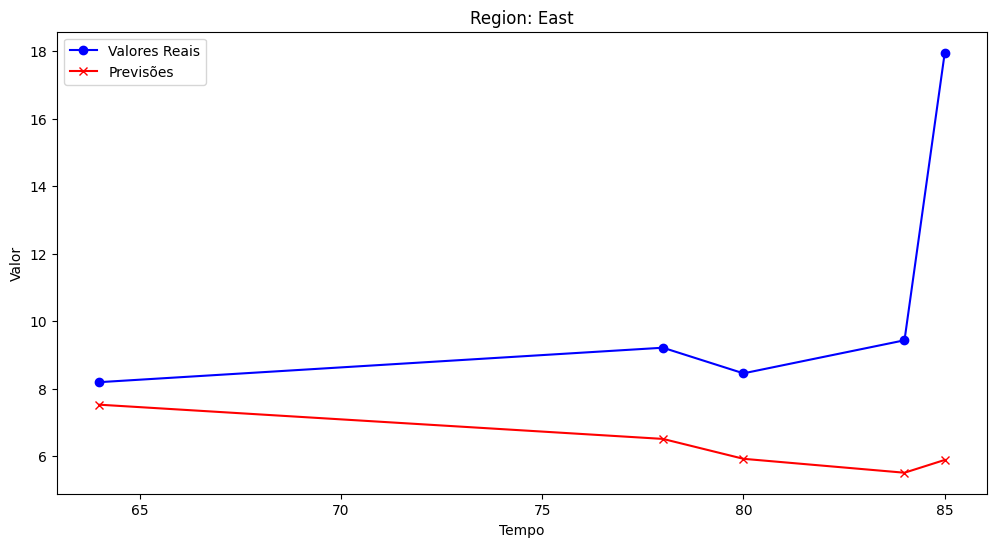

Região: West
Dimensões de X: (28, 2)
Dimensões de y: (28,)


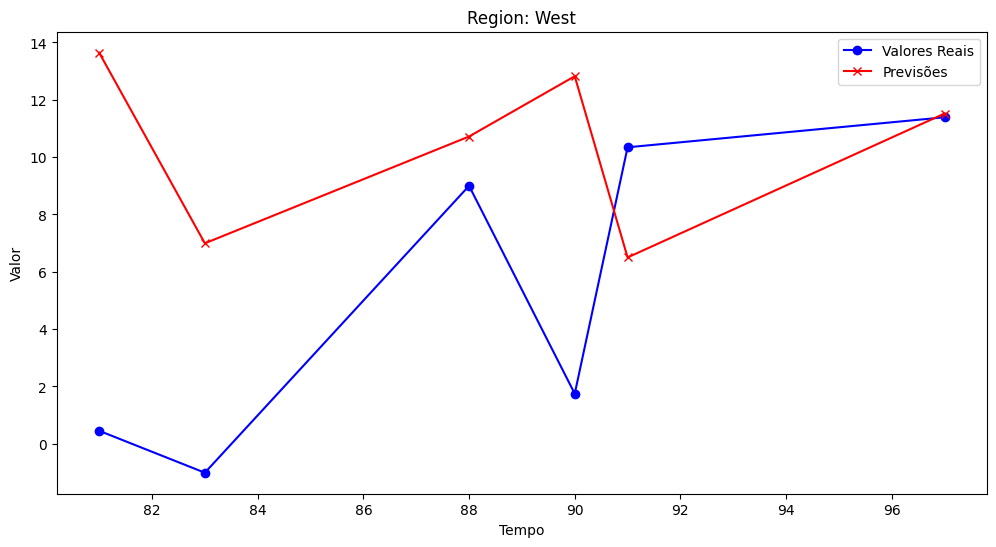

Região: North
Mean Absolute Error (MAE): 3.0736299765415724
Root Mean Squared Error (RMSE): 3.2335073426003205

Região: South
Mean Absolute Error (MAE): 5.703059731449662
Root Mean Squared Error (RMSE): 7.100560541306438

Região: East
Mean Absolute Error (MAE): 4.377162874561374
Root Mean Squared Error (RMSE): 5.916796971340452

Região: West
Mean Absolute Error (MAE): 6.327064230060938
Root Mean Squared Error (RMSE): 7.941503474167687



In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de dados (substitua com seus próprios dados)
np.random.seed(42)
regions = ['North', 'South', 'East', 'West']
n = 100
data = {
    'region': np.random.choice(regions, n),
    'time': np.arange(n),
    'value': np.concatenate([0.5 * np.arange(n//4) + 2 + np.random.normal(0, 5, n//4) for _ in regions])
}
df = pd.DataFrame(data)

# Inicializar um dicionário para armazenar modelos e resultados
models = {}
results = {}

for region in regions:
    # Filtrar dados por região
    df_region = df[df['region'] == region].copy()
    
    # Criar features de atraso
    df_region['lag_1'] = df_region['value'].shift(1)
    df_region['lag_2'] = df_region['value'].shift(2)
    
    # Remover linhas com valores NaN
    df_region.dropna(inplace=True)
    
    # Separar variáveis independentes e dependentes
    X = df_region[['lag_1', 'lag_2']]
    y = df_region['value']
    
    # Verificar as dimensões de X e y
    print(f"Região: {region}")
    print(f"Dimensões de X: {X.shape}")
    print(f"Dimensões de y: {y.shape}")

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Criar e treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular métricas de desempenho
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[region] = {'MAE': mae, 'RMSE': rmse}

    # Visualizar os resultados
    plt.figure(figsize=(12, 6))
    # Ajustar o índice para garantir que estamos plotando corretamente
    test_time = df_region['time'].iloc[-len(y_test):].values
    plt.plot(test_time, y_test, label='Valores Reais', color='blue', marker='o')
    plt.plot(test_time, y_pred, label='Previsões', color='red', marker='x')
    plt.title(f'Region: {region}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

# Exibir resultados
for region, metrics in results.items():
    print(f"Região: {region}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print()
